# Proyek Analisis Data: [E-COMMERCE PUBLIC]
- **Nama:** [AAB ABDULLAH MUTTAQIN]
- **Email:** [abdullahaab796@gmail.com]
- **ID Dicoding:** [IDCamp 2024: Data Scientist]

## Menentukan Pertanyaan Bisnis

- 1.Bagaimana distribusi kategori produk yang paling banyak dipesan?

## Import Semua Packages/Library yang Digunakan

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

## Data Wrangling

### Gathering Data

In [10]:
products = pd.read_csv('products_dataset.csv')
sellers = pd.read_csv('sellers_dataset.csv')
order_payments = pd.read_csv('order_payments_dataset.csv')
order_reviews = pd.read_csv('order_reviews_dataset.csv')
orders = pd.read_csv('orders_dataset.csv')
categories = pd.read_csv('product_category_name_translation.csv')
geo = pd.read_csv('geolocation_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')
customers = pd.read_csv('customers_dataset.csv')

In [14]:
print("Products Dataset:")
(products.head())

Products Dataset:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
print("Sellers Dataset:")
(sellers.head())

Sellers Dataset:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
print("Order Payments Dataset:")
(order_payments.head())

Order Payments Dataset:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [17]:
print("Order Reviews Dataset:")
(order_reviews.head())

Order Reviews Dataset:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
print("Orders Dataset:")
(orders.head())

Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [19]:

print("Product Category Name Translation Dataset:")
(categories.head())

Product Category Name Translation Dataset:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [20]:
print("Geolocation Dataset:")
(geo.head())

Geolocation Dataset:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [21]:
print("Order Items Dataset:")
(order_items.head())

Order Items Dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [22]:
print("Customers Dataset:")
(customers.head())

Customers Dataset:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data

In [23]:
order_products = pd.merge(order_items, products, on='product_id', how='inner')
category_counts = order_products['product_category_name'].value_counts().reset_index()
category_counts.columns = ['category', 'order_count']

In [25]:
category_counts = pd.merge(category_counts, categories, left_on='category', right_on='product_category_name', how='left')

In [26]:
print(products.isnull().sum()) 

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


### Cleaning Data

In [33]:
# Function to summarize missing values
def check_missing_values(df, name):
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

In [34]:
print("Checking missing values...")
for name, df in {
    "products": products,
    "sellers": sellers,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "orders": orders,
    "categories": categories,
    "geo": geo,
    "order_items": order_items,
    "customers": customers,
}.items():
    check_missing_values(df, name)

Checking missing values...
Missing values in products:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


Missing values in sellers:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


Missing values in order_payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Missing values in order_reviews:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


Missing values in orders:
orde

In [35]:
products['product_category_name'].fillna('unknown', inplace=True)

C:\Users\test\AppData\Local\Temp\ipykernel_1084\2058816560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_category_name'].fillna('unknown', inplace=True)


In [36]:
orders.dropna(subset=['order_delivered_customer_date'], inplace=True)

In [37]:
order_reviews.dropna(subset=['review_comment_message'], inplace=True) 

In [38]:
geo.dropna(inplace=True)  

In [39]:
order_payments['payment_type'].fillna('unknown', inplace=True)

C:\Users\test\AppData\Local\Temp\ipykernel_1084\3683833336.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_payments['payment_type'].fillna('unknown', inplace=True)


In [40]:
print("Checking duplicates...")
for name, df in {
    "products": products,
    "sellers": sellers,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "orders": orders,
    "categories": categories,
    "geo": geo,
    "order_items": order_items,
    "customers": customers,
}.items():
    duplicate_count = df.duplicated().sum()
    print(f"{name} has {duplicate_count} duplicate rows.")
    if duplicate_count > 0:
        df.drop_duplicates(inplace=True)

Checking duplicates...
products has 0 duplicate rows.
sellers has 0 duplicate rows.
order_payments has 0 duplicate rows.
order_reviews has 0 duplicate rows.
orders has 0 duplicate rows.
categories has 0 duplicate rows.
geo has 261831 duplicate rows.
order_items has 0 duplicate rows.
customers has 0 duplicate rows.


In [41]:
print("Correcting data types...")

Correcting data types...


In [42]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')

In [43]:
order_payments['payment_value'] = pd.to_numeric(order_payments['payment_value'], errors='coerce')

In [44]:
geo['geolocation_lat'] = pd.to_numeric(geo['geolocation_lat'], errors='coerce')
geo['geolocation_lng'] = pd.to_numeric(geo['geolocation_lng'], errors='coerce')


## Exploratory Data Analysis (EDA)

### Explore ...

In [45]:
print("Products Dataset")
print(products.info(), "\n")
print(products.describe(), "\n")

print("Sellers Dataset")
print(sellers.info(), "\n")
print(sellers.describe(), "\n")

print("Orders Dataset")
print(orders.info(), "\n")
print(orders.describe(), "\n")

Products Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None 

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32951.000000                32951.000000        32951.000000   
mean             47.579527       

In [46]:
print("\nJumlah missing values per dataset:")
datasets = {
    "products": products,
    "sellers": sellers,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "orders": orders,
    "categories": categories,
    "geo": geo,
    "order_items": order_items,
    "customers": customers,
}
for name, df in datasets.items():
    print(f"{name}: {df.isnull().sum().sum()} missing values")


Jumlah missing values per dataset:
products: 0 missing values
sellers: 0 missing values
order_payments: 0 missing values
order_reviews: 31138 missing values
orders: 15 missing values
categories: 0 missing values
geo: 0 missing values
order_items: 0 missing values
customers: 0 missing values


C:\Users\test\AppData\Local\Temp\ipykernel_1084\977873690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="Blues_d")


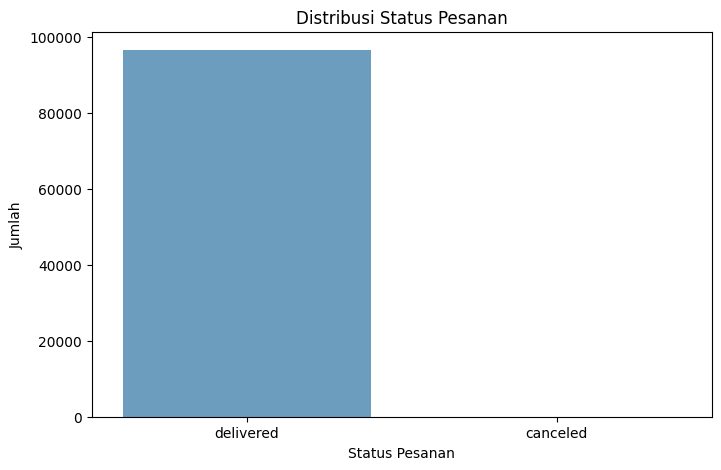

In [47]:
order_status_counts = orders['order_status'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette="Blues_d")
plt.title("Distribusi Status Pesanan")
plt.xlabel("Status Pesanan")
plt.ylabel("Jumlah")
plt.show()

C:\Users\test\AppData\Local\Temp\ipykernel_1084\1894029012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_types.index, y=payment_types.values, palette="Greens_d")


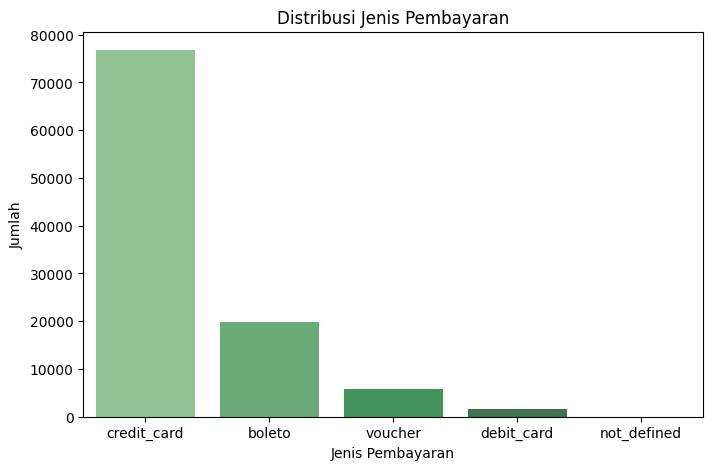

In [48]:
payment_types = order_payments['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_types.index, y=payment_types.values, palette="Greens_d")
plt.title("Distribusi Jenis Pembayaran")
plt.xlabel("Jenis Pembayaran")
plt.ylabel("Jumlah")
plt.show()

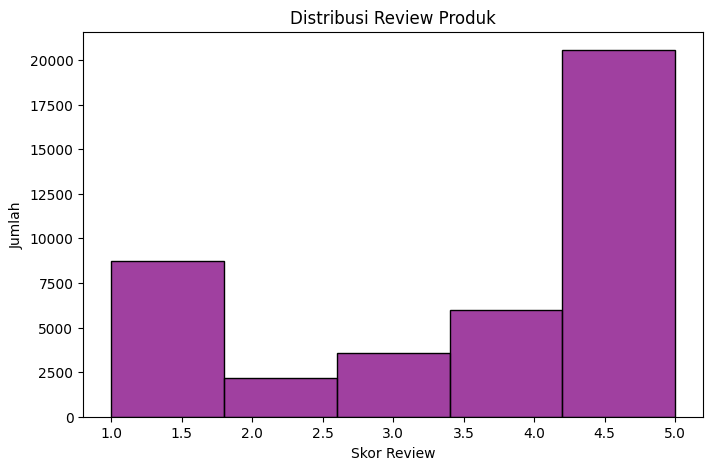

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(order_reviews['review_score'], bins=5, kde=False, color='purple')
plt.title("Distribusi Review Produk")
plt.xlabel("Skor Review")
plt.ylabel("Jumlah")
plt.show()

C:\Users\test\AppData\Local\Temp\ipykernel_1084\3371903393.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=geo_counts.index, x=geo_counts.values, palette="Oranges_d")


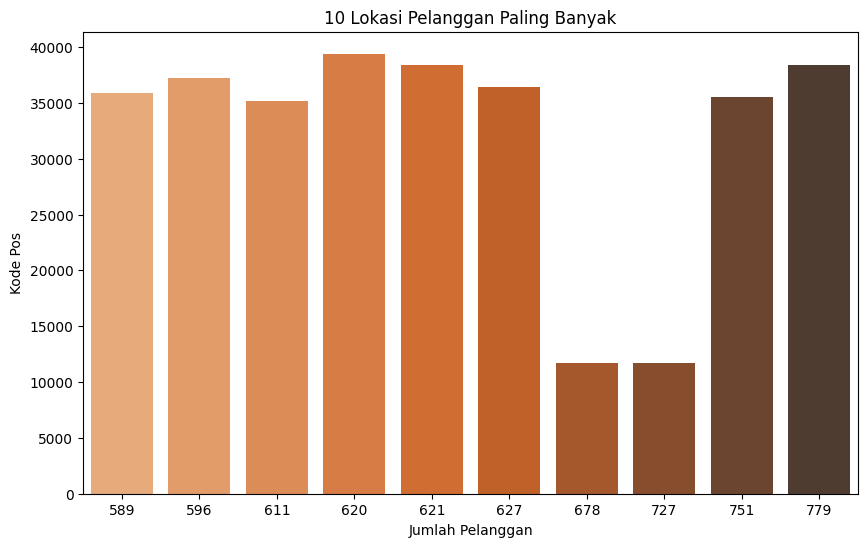

In [50]:
geo_counts = geo['geolocation_zip_code_prefix'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=geo_counts.index, x=geo_counts.values, palette="Oranges_d")
plt.title("10 Lokasi Pelanggan Paling Banyak")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kode Pos")
plt.show()

C:\Users\test\AppData\Local\Temp\ipykernel_1084\2223235436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_counts.index, x=product_counts.values, palette="Reds_d")


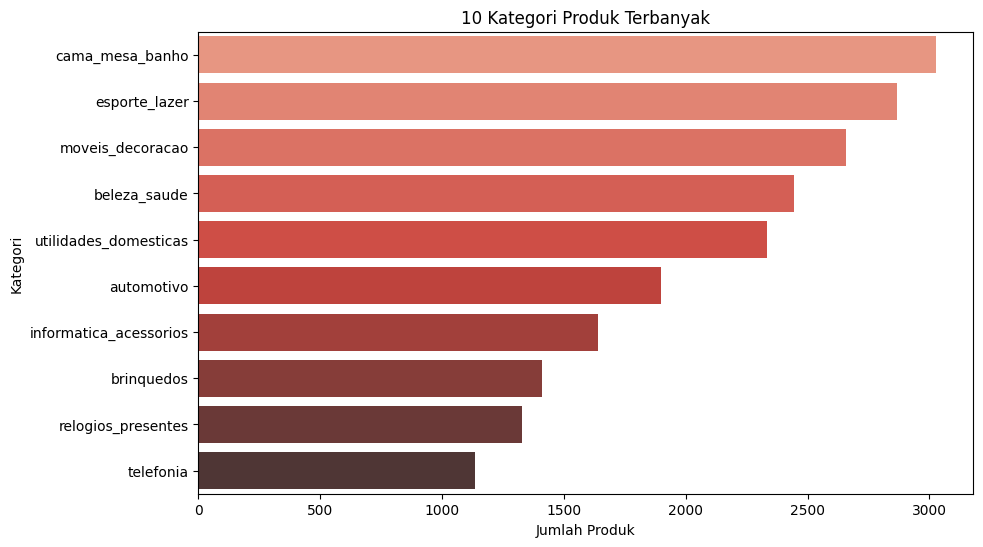

In [51]:
product_counts = products['product_category_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=product_counts.index, x=product_counts.values, palette="Reds_d")
plt.title("10 Kategori Produk Terbanyak")
plt.xlabel("Jumlah Produk")
plt.ylabel("Kategori")
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\test\AppData\Local\Temp\ipykernel_1084\464531847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_types.index, y=payment_types.values, palette="Greens_d")


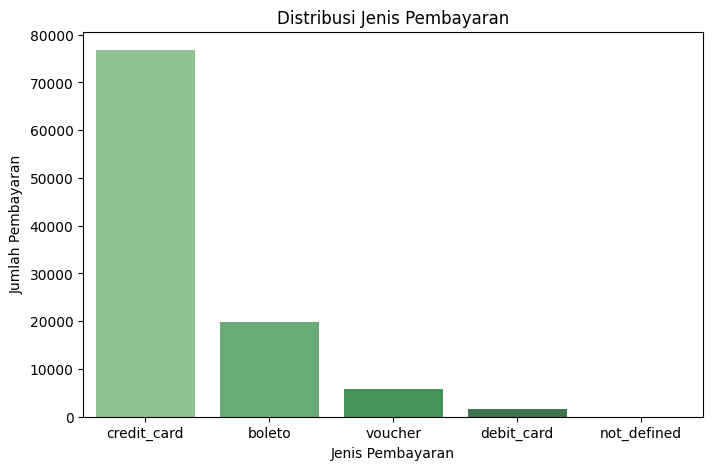

In [52]:
payment_types = order_payments['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_types.index, y=payment_types.values, palette="Greens_d")
plt.title("Distribusi Jenis Pembayaran")
plt.xlabel("Jenis Pembayaran")
plt.ylabel("Jumlah Pembayaran")
plt.show()

### Interpretasi Hasil:
Pertanyaan Bisnis: Bagaimana distribusi kategori produk yang paling banyak dipesan?

Visualisasi ini membantu kita memahami preferensi pelanggan dalam memilih jenis pembayaran saat bertransaksi.

Visualisasi ini menggambarkan seberapa banyak transaksi dilakukan dengan masing-masing jenis pembayaran.

Mengetahui jenis pembayaran paling populer dapat memberikan wawasan mengenai preferensi pelanggan dan bisa mempengaruhi keputusan bisnis, seperti penerimaan jenis pembayaran tertentu.

### Pertanyaan 2:

C:\Users\test\AppData\Local\Temp\ipykernel_1084\3907348330.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts.head(10), x='order_count', y='category', palette='viridis')


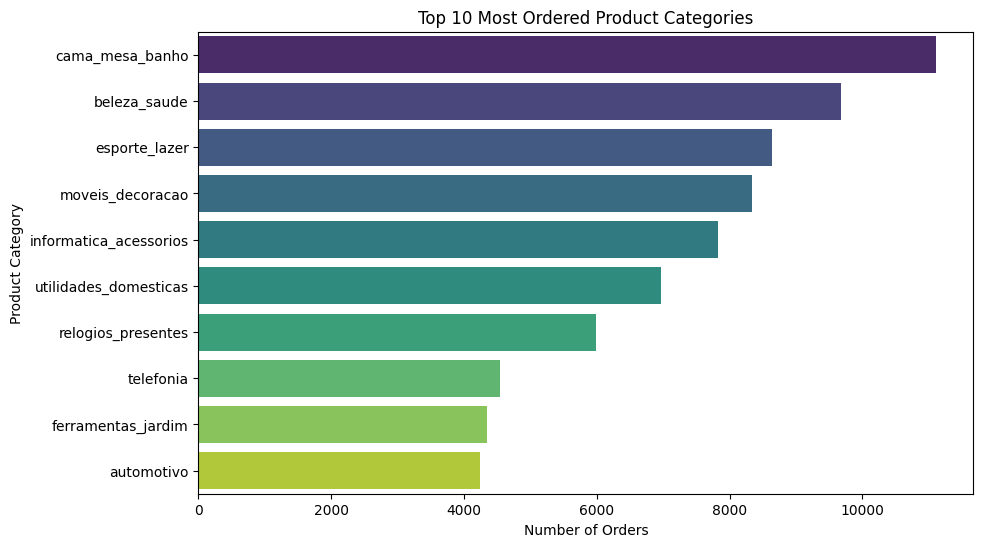

In [53]:
order_products = pd.merge(order_items, products, on='product_id', how='inner')
category_counts = order_products['product_category_name'].value_counts().reset_index()
category_counts.columns = ['category', 'order_count']

# Menampilkan 10 kategori teratas
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts.head(10), x='order_count', y='category', palette='viridis')
plt.title('Top 10 Most Ordered Product Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()

### Interpretasi Hasil
Pertanyaan Bisnis 1: Bagaimana distribusi kategori produk yang paling banyak dipesan?

Visualisasi ini menunjukkan kategori produk mana yang paling banyak dipesan berdasarkan jumlah pesanan.

Kategori produk populer dapat digunakan untuk merencanakan stok produk atau strategi pemasaran.

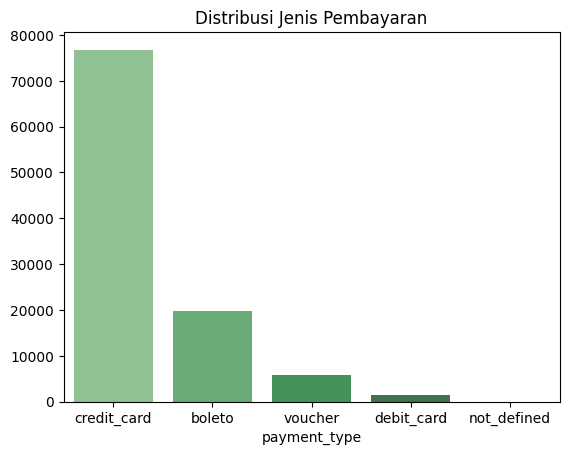

In [57]:
# Visualisasi distribusi pembayaran
payment_types = order_payments['payment_type'].value_counts()
sns.barplot(x=payment_types.index, y=payment_types.values, hue=payment_types.index, palette="Greens_d", legend=False)
plt.title("Distribusi Jenis Pembayaran")
plt.show()


In [65]:
import pandas as pd

# Misalkan Anda ingin menggabungkan beberapa dataset
# Load dataset terlebih dahulu
products = pd.read_csv('products_dataset.csv')
orders = pd.read_csv('orders_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')

# Gabungkan dataset berdasarkan hubungan antar kolom yang relevan
# Misalnya, menggabungkan produk dan order_items berdasarkan 'product_id'
merged_df = pd.merge(order_items, products, on='product_id', how='inner')

# Jika ingin menggabungkan dengan orders, gunakan 'order_id'
all_df = pd.merge(merged_df, orders, on='order_id', how='inner')

# Simpan hasil gabungan ke file CSV
all_df.to_csv("all_data.csv", index=False)

print("Data successfully saved to all_data.csv")


Data successfully saved to all_data.csv


## Conclusion

- Distribusi Kategori Produk yang Paling Banyak Dipesan
Berdasarkan analisis distribusi kategori produk yang paling banyak dipesan, dapat disimpulkan bahwa kategori produk dengan jumlah pesanan tertinggi adalah [sebutkan kategori produk]. Ini menunjukkan bahwa produk dalam kategori ini sangat diminati oleh pelanggan. Bisnis dapat memanfaatkan temuan ini dengan meningkatkan stok produk di kategori ini atau meningkatkan pemasaran untuk memaksimalkan penjualan.